<a href="https://colab.research.google.com/github/sunkusun9/ML2022_1/blob/main/univariate_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# 한글 폰트 설정
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 다시 시작 필요

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cach

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

# 단일 변수 선형 회귀 모델



$\hat{y}=\beta_0 + \beta_1x$



In [27]:
import numpy as np

## 선형 회귀 분석을 보이기 위한 임의의 데이터 생성



* 표준정규분포(평균=0, 분산=1인 정규분포)를 따르는 임의의 변수 100개를 생성

In [28]:
n = 100 # 데이터 생성 수
np.random.seed(42) # 랜덤 Seedㄹ를 42로 지정하여 동일한 난수 생성
x = np.random.normal(size=n) # 표준정규분포(평균=0, 분산=1인 정규분포)

* x의 히스토그램을 출력하여 값을 확인한다

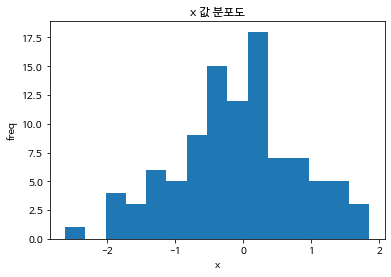

In [29]:
plt.hist(x, bins=15) # x의 히스토그램을 15개의 구간을 사용하여 출력
plt.xlabel("x")
plt.ylabel("freq")
plt.title("x 값 분포도")
plt.show()

* 기울기가 2.5, 절편이 3.2 이고 표준편차를 0.2의 노이즈를 주어 x에 대한 y값을 생성

In [30]:
beta_0, beta_1, noise = 2.5, 3.2, 1.0
eps = np.random.normal(scale=0.2, size=n)
y = x * beta_1 + beta_0 + eps

* x,y 산포도 그래프 출력

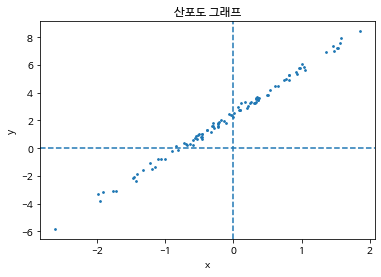

In [31]:
plt.scatter(x, y, s=3) # x, y의 산포도 그래프 출력
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프")
plt.show()

# 정규방정식(Ordinary Least Squares) - I

Ordinary Least Squares 방법으로,

임의로 생성한 데이터셋으로 단일변수 선형회귀모델을 학습시켜보자.

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})y_i}{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}$,  $\hat{\beta_0}=\bar{y} - \beta_1\bar{x}$

$\bar{x}=\frac{\sum\limits_{i=1}^{n}x_i}{n}$,  $\bar{y}=\frac{\sum\limits_{i=1}^{n}y_i}{n}$

* 위 정규방정식을 이용하여 beta_1, beta_0를 구하라

In [32]:
x_bar = np.mean(x) # X의 평균을 구한다
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
beta_1 = np.sum(x_diff * y) / np.sum(np.square(x_diff)) # beta_1을 구한다.
beta_0 = np.mean(y) - beta_1 * np.mean(x) # beta_0를 구한다.
beta_0, beta_1

(2.5014855659727933, 3.1713485679457114)

In [8]:
# Tip: np.sum(x_diff * y)는 2번의 Vector 연산이 필요이를 dot을 사용하면 한 번으로 줄일 수 있다 .
beta_1 = np.dot(x_diff, y) / np.sum(np.square(x_diff)) 
beta_1

3.171348567945711

In [9]:
%%timeit
beta_1 = np.sum(x_diff * y) / np.sum(np.square(x_diff)) # beta_1을 구한다.

10.8 µs ± 609 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [10]:
%%timeit
# Tip: np.sum(x_diff * y)는 2번의 Vector 연산이 필요이를 dot을 사용하면 한 번으로 줄일 수 있다 .
beta_1 = np.dot(x_diff, y) / np.sum(np.square(x_diff)) 

13 µs ± 4.8 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


* (x, y) 산포도 그래프 위에 위에서 구한 회귀선 출력

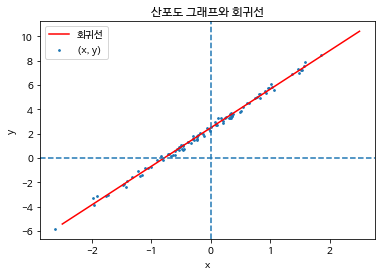

In [11]:
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
x_space = np.linspace(-2.5, 2.5, 10)
plt.plot(x_space, beta_0 + beta_1 * x_space, c='r', label='회귀선')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum\limits_{i=1}^{n}(x_i-\bar{x})^2}$

* 위 식으로 beta_1을 구하자

In [12]:
x_bar = np.mean(x)
y_bar = np.mean(y)
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
y_diff = (y - y_bar) # y_i와 y_bar의 차이를 구한다.
beta_1 = np.sum(x_diff * y_diff) / np.sum(np.square(x_diff)) # beta_1을 구한다.
beta_1

3.17134856794571

[Practice]

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(y_i-\bar{y})x_i}{\sum\limits_{i=1}^{n}(x_i-\bar{x})x_i}$

$\hat{\beta_1}=\frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})y_i}{\sum\limits_{i=1}^{n}(x_i-\bar{x})x_i}$

In [13]:
x_bar = np.mean(x)
y_bar = np.mean(y)
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
y_diff = (y - y_bar) # y_i와 y_bar의 차이를 구한다.
beta_1 = np.sum(y_diff * x) / np.sum(x_diff * x) # beta_1을 구한다.
beta_1

3.1713485679457123

In [14]:
x_bar = np.mean(x)
y_bar = np.mean(y)
x_diff = (x - x_bar) # x_i와 x_bar의 차이를 구한다.
y_diff = (y - y_bar) # y_i와 y_bar의 차이를 구한다.
beta_1 = np.sum(x_diff * y) / np.sum(x_diff * x) # beta_1을 구한다.
beta_1

3.1713485679457123

# 정규방정식(Ordinary Least Squares) - II

$\beta=(X^TX)^{-1}X^Ty$

* 모두 1일 열을 추가

In [ ]:
X = np.hstack([np.ones((n, 1)), np.expand_dims(x.T, axis= 1)]) # 사이즈가 nx1인 모든 값이 1인 matrix 생성, 벡터 x를 nx1인 Matrix로 변환하고 이를 종으로 합친다.
X.shape, X[:3] # Matrix X의 모양과, 첫번째 3행까지 확인

* 위 공식으로 벡터 $\beta$ 를 구하라

In [ ]:
# Gram Matrix 구하기
Xt_by_X = np.matmul(X.T, X)
# Gram Matrix의 역행렬 구하기
inv_Xt_by_X = np.linalg.inv(Xt_by_X)
# XT_by_y 구하기 
XT_by_y = np.matmul(X.T, y)
# beta_hat 구하기
beta_hat = np.matmul(inv_Xt_by_X, XT_by_y)
beta_hat

array([2.50148557, 3.17134857])

[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression)을 사용하여 구해보자

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(np.expand_dims(x, axis=-1), y) # 학습 시킨다. X를 matrix로 변경한다

LinearRegression()

In [ ]:
lr.coef_, lr.intercept_

(array([3.17134857]), 2.5014855659727933)

위 매뉴얼을 보면, 
> From the implementation point of view, this is just plain Ordinary Least Squares (scipy.linalg.lstsq) or Non Negative Least Squares (scipy.optimize.nnls) wrapped as a predictor object.

[Pratice] 여기서 scipy.linalg.lstsq로 해보자.

In [24]:
from scipy.linalg import lstsq

SyntaxError: ignored

# 경사하강법(Gradient Descent)

예제)
경사하강법으로 $y=(x-2)^2 + 3$의 y를 최소로 하는 x의 값을 구한다. 초기점을 포한하여 매단계 별 x값을 x_hist에 리스트로 남긴다.

* 반복횟수 = 5, 이동폭 0.3

In [ ]:
#x =np.random.rand(1)[0] * 3 # [-3, 3]에서 임의 값으로 지정
optimal = 3
optimal_x = 2

x = -1
x_hist = [x] # X값의 history
epochs = 5 # 반복 횟수
rate = 0.3 # 이동폭
for i in range(epochs):
    delta_y = 2 * (x - optimal_x) # 미분값을 구한다
    x -= rate * delta_y # x값을 업데이트 한다.
    x_hist.append(x) # X값 history에 추가

* x가 [-1, 5]인 (x, y) 그래프를 그리고, 각 단계별 이동점을 표시한다.

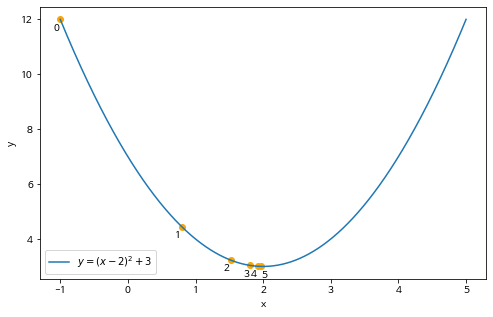

In [ ]:
import matplotlib.lines as mlines
plt.figure(figsize=(8, 5)) # 표 설정
X_plot = np.linspace(-1, 5, 1000)
Y_plot = np.square(X - optimal_x) + optimal
plt.plot(X_plot, Y_plot, label="$y=(x-2)^2 + 3$") # X, Y 그래프 출력
# x, y 변화점 출력
x_hist = np.array(x_hist)
y_hist = np.square(x_hist - 2) + 3
plt.scatter(x_hist, y_hist, c='orange')
for i, (x_, y_) in enumerate(zip(x_hist, y_hist)):
    plt.annotate(str(i), (x_, y_), xytext=(x_ - (0.1 if i < 5 else 0.0), y_ - 0.4))
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## 이동폭 (step size)

* 이동이 [1, 0.3, 0.03] 각각에 대한 그래프를 그린다.

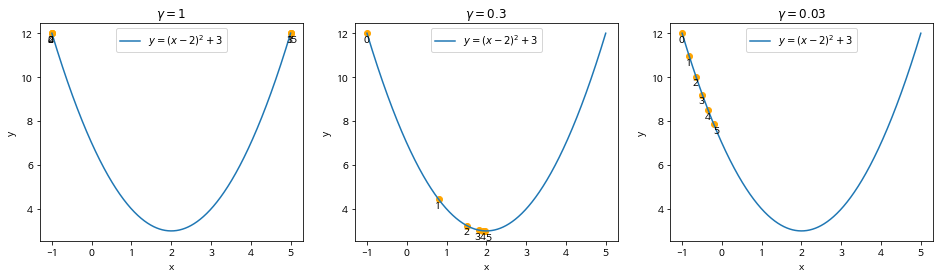

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4)) # 1x3 표 생성
for rate, ax_ in zip([1, 0.3, 0.03], ax): # 이동폭을 [1, 0.3, 0.01]에 대한 반복, 결과 ax도 묶어서 반복한다.
    # 경사하강으로 최적화
    x = -1
    x_hist = [x] 
    epochs = 5 # 반복 횟수
    for i in range(epochs):
        delta_y = 2 * (x - 2)
        x -= rate * delta_y
        x_hist.append(x)
    # 표출력
    ax_.plot(X_plot, Y_plot, label="$y=(x-2)^2 + 3$")
    x_hist = np.array(x_hist)
    y_hist = np.square(x_hist - 2) + 3
    ax_.scatter(x_hist, y_hist, c='orange')
    for i, (x_, y_) in enumerate(zip(x_hist, y_hist)):
        ax_.annotate(str(i), (x_, y_), xytext=(x_ - (0.1 if i < 5 else 0.0), y_ - 0.4)) # 단계출력
    ax_.set_xlabel("x")
    ax_.set_ylabel("y")
    ax_.legend()
    ax_.set_title("$\gamma={}$".format(rate))
plt.show()

## 반복횟수(epochs)

* y값의 이전 단계와의 차이가 1e-2이하로 5번이상 유지 됐을 때 수렴했다고 판단할때 수렴했을 때의 단계를 구한다. 
* 반복수는 50, 이동폭:0.1

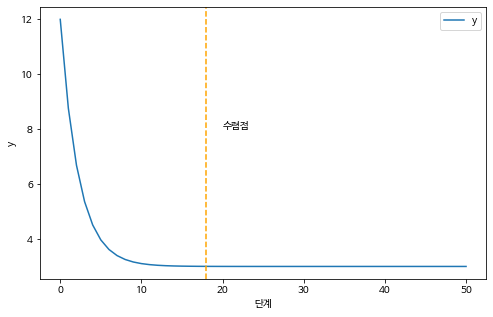

In [ ]:
x = -1
y = (x - 2) ** 2 + 3
x_hist = [x]
y_hist = [y]
rate = 0.1
epochs = 50 # 반복 횟수
converge_thres = 1e-2 # 수렴점
converge_cnt = 0 # 수렴점이하로 유지된 반복수
converge_max_cnt = 5 # 수렴이라 결정할 때의 최대 converge_cnt
converge_iter = -1
for i in range(epochs):
    prev_y = y # y_diff(y의 변화값)을 구하기 위해 저장
    delta_y = 2 * (x - 2)
    x -= rate * delta_y
    y = (x - 2) ** 2 + 3
    x_hist.append(x)
    y_hist.append(y)
    y_diff = prev_y - y
    if y_diff < converge_thres:
        converge_cnt +=1
        if converge_cnt >= converge_max_cnt and converge_iter < 0: # 최초의 수렴시점을 기록
            converge_iter = i + 1
    else:
        converge_cnt = 0


* 단계별 y값을 출력하라

In [ ]:
plt.figure(figsize=(8, 5)) # 표 설정
# epoch에 따른 y값 출력
plt.plot(y_hist, label='y')
plt.axvline(converge_iter, linestyle='--', color='orange')
plt.annotate("수렴점", (20, 8))
plt.xlabel("단계")
plt.ylabel("y")
plt.legend()
plt.show()

## 경사하강법(Gradient Descent)를 통한 선형 회귀(Linear Regression) 학습

$\frac{\partial F}{\partial\beta_0}=\frac{\sum\limits_{i=1}^{n}-(y_i-\beta_0-\beta_1x)}{n}$

$\frac{\partial F}{\partial\beta_1}=\frac{\sum\limits_{i=1}^{n}-x_i(y_i-\beta_0-\beta_1x)}{n}$

In [ ]:
# 위와 동일한 회귀 데이터셋 생성
n = 100
np.random.seed(42)
x = np.random.normal(size=n)
eps = np.random.normal(scale=0.2, size=n)
beta_0, beta_1, noise = 2.5, 3.2, 1.0
y = x * beta_1 + beta_0 + eps

* beta_0, beta_1을 [-1, 1] 사이의 임의 수로 초기화
* loss_hist에는 단계별 손실을, beta_hist에는 단계별 beta_0, beta_1의 튜플을 기록
* 반복수는 20 이고 학습율은 0.25로 하여 경사하강법을 이용하여 

In [ ]:
beta_0, beta_1 = np.random.rand(2) * 2 - 1 # 초기값 설정 [-1, 1]
loss_hist = []
beta_hist = [(beta_0, beta_1)]
epochs = 20

y_hat = beta_0 + beta_1 * x
learning_rate = 0.25
mse =  np.mean(np.square(y, y_hat))
loss_hist.append(mse)

In [ ]:
for i in range(epochs):
    y_delta = y - beta_0 - beta_1 * x
    y_delta_by_beta_0 = -np.mean(y_delta) # beta_0의 미분값
    y_delta_by_beta_1 = -np.mean(y_delta * x) # beta_1의 미분값
    beta_0 -= y_delta_by_beta_0 * learning_rate
    beta_1 -= y_delta_by_beta_1 * learning_rate
    y_hat = beta_0 + beta_1 * x
    mse = np.mean(np.square(y - y_hat))
    beta_hist.append((beta_0, beta_1))
    loss_hist.append(mse)

* 단계별 손실을 출력

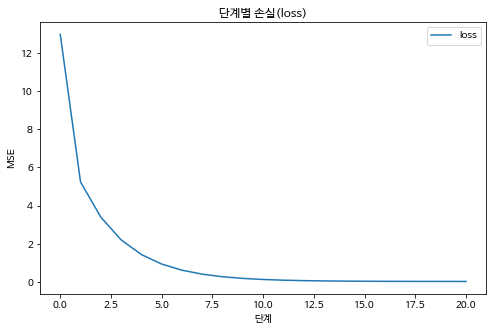

In [ ]:
plt.figure(figsize=(8, 5)) # 표 설정
# epoch에 따른 y값 출력
plt.plot(loss_hist, label='loss')
plt.xlabel("단계")
plt.ylabel("MSE")
plt.legend()
plt.title("단계별 손실(loss)")
plt.show()

In [ ]:
beta_0, beta_1

(2.482804271575319, 3.1338839682281825)

* (x, y)의 산포도 그래프를 그리고, 각 단계별 직선을 출력한다.

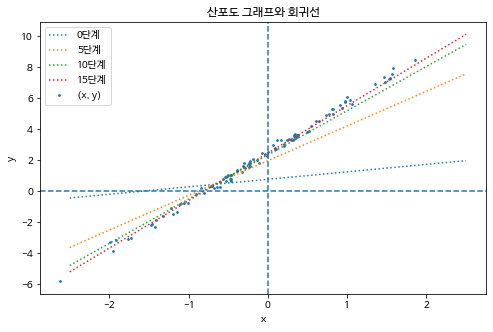

In [ ]:
plt.figure(figsize=(8, 5)) # 표 설정
# x, y의 산포도 그래프 출력
plt.scatter(x, y, s=3, label='(x, y)')
x_space = np.linspace(-2.5, 2.5, 10)
# 단계별 회귀선 출력
for i in range(0,16,5): 
    beta_0, beta_1 = beta_hist[i]
    plt.plot(x_space, beta_0 + beta_1 * x_space, label='{}단계'.format(i), linestyle='dotted')
plt.axhline(0, linestyle='dashed')
plt.axvline(0, linestyle='dashed')
plt.xlabel("x")
plt.ylabel("y")
plt.title("산포도 그래프와 회귀선")
plt.legend()
plt.show()

## 미니 배치(mini-batch) 경사하강법(gradient descent)

* 배치 크기: 16, 반복수: 10, 학습율: 0.25 으로 하고 각 스텝 별 손실을 loss_hist_step에 리스트로 남기고
* loss_hist와 beta_hist는 위와 같은 내용으로 미니 배치 경사하강법으로 beta_0, beta_1을 구하라(초기화도 동일)

In [ ]:
beta_0, beta_1 = np.random.rand(2) * 2 - 1 # 초기값 설정 [-1, 1]
loss_hist = []
loss_hist_step = []
beta_hist = [(beta_0, beta_1)]
epochs = 10
batch_size = 16 # Batch size

y_hat = beta_0 + beta_1 * x
learning_rate = 0.25
mse =  np.mean(np.square(y, y_hat))
loss_hist.append(mse)

In [ ]:
for i in range(epochs):
    for j in range(0,n,batch_size):
        # j번째 배치 세트를 만든다.
        x_c = x[j:j + batch_size] 
        y_c = y[j:j + batch_size]
        y_delta = y_c - beta_0 - beta_1 * x_c
        y_delta_by_beta_0 = -np.mean(y_delta) # beta_0의 미분값
        y_delta_by_beta_1 = -np.mean(y_delta * x_c) # beta_1의 미분값
        beta_0 -= y_delta_by_beta_0 * learning_rate
        beta_1 -= y_delta_by_beta_1 * learning_rate
        y_hat_c = beta_0 + beta_1 * x_c
        mse_c = np.mean(np.square(y_c - y_hat_c))
        loss_hist.append(mse_c)
    y_hat = beta_0 + beta_1 * x
    mse = np.mean(np.square(y - y_hat))
    beta_hist.append((beta_0, beta_1))
    loss_hist.append(mse)

스텝별 손실을 기록

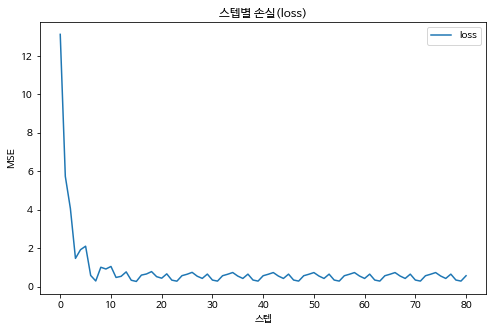

In [ ]:
plt.figure(figsize=(8, 5)) # 표 설정
# epoch에 따른 y값 출력
plt.plot(loss_hist, label='loss')
plt.xlabel("스텝")
plt.ylabel("MSE")
plt.legend()
plt.title("스텝별 손실(loss)")
plt.show()

* 배치의 크기를 [1, 4, 8, 16] 따른 손실에 대한 스텝별 추세를 출력한다.

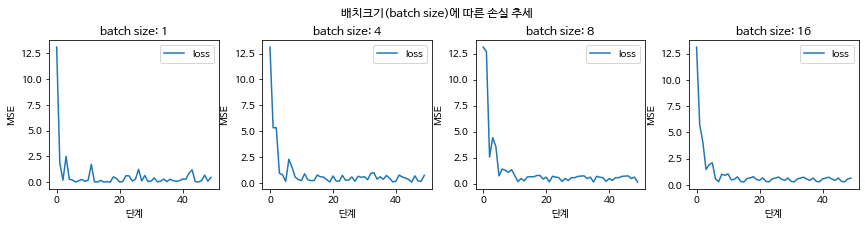

In [ ]:
# 위와 동일한 회귀 데이터셋 생성
n = 100
np.random.seed(42)
sort_ = False
x = np.random.normal(size=n)
eps = np.random.normal(scale=0.8, size=n)
beta_0, beta_1, noise = 2.5, 3.2, 1.0
y = x * beta_1 + beta_0 + eps
if sort_:
    x = x[np.argsort(y)]
    y = np.sort(y)
fig, axs = plt.subplots(1, 4, figsize=(12, 3)) # 1x4 표 영역 생성
if sort_:
    plt.suptitle("배치크기(batch size)에 따른 손실 추세(정렬)", verticalalignment="bottom")
else:
    plt.suptitle("배치크기(batch size)에 따른 손실 추세", verticalalignment="bottom")
for batch_size, ax in zip([1, 4, 8, 16], axs):
    beta_0, beta_1 = np.random.rand(2) * 2 - 1 # 초기값 설정 [-1, 1]
    loss_hist = []
    loss_hist_step = []
    beta_hist = [(beta_0, beta_1)]
    epochs = 10

    y_hat = beta_0 + beta_1 * x
    learning_rate = 0.25
    mse =  np.mean(np.square(y, y_hat))
    loss_hist.append(mse)

    for i in range(epochs):
        for j in range(0,n,batch_size):
            # j번째 배치 세트를 만든다.
            x_c = x[j:j + batch_size] 
            y_c = y[j:j + batch_size]
            y_delta = y_c - beta_0 - beta_1 * x_c
            y_delta_by_beta_0 = -np.mean(y_delta) # beta_0의 미분값
            y_delta_by_beta_1 = -np.mean(y_delta * x_c) # beta_1의 미분값
            beta_0 -= y_delta_by_beta_0 * learning_rate
            beta_1 -= y_delta_by_beta_1 * learning_rate
            y_hat_c = beta_0 + beta_1 * x_c
            mse_c = np.mean(np.square(y_c - y_hat_c))
            loss_hist.append(mse_c)
        y_hat = beta_0 + beta_1 * x
        mse = np.mean(np.square(y - y_hat))
        beta_hist.append((beta_0, beta_1))
        loss_hist.append(mse)
    # epoch에 따른 y값 출력
    ax.plot(loss_hist[:50], label='loss')
    ax.set_xlabel("단계")
    ax.set_ylabel("MSE")
    ax.set_title('batch size: {}'.format(batch_size))
    ax.legend()

plt.tight_layout()
plt.show()

## 오류(error, 잔차/residual) 분석

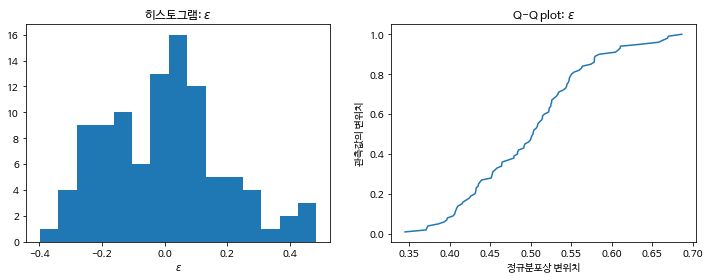

In [18]:
from scipy.stats import norm
y_hat = beta_0 + beta_1 * x
eps = y - y_hat

fig, axs= plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(eps, bins=15)
axs[0].set_xlabel("$\\epsilon$")
axs[0].set_title("히스토그램: $\\epsilon$")
eps_sort = eps.copy()
eps_sort.sort()
axs[1].plot(norm.cdf(eps_sort), np.arange(1, eps.shape[0] + 1) / eps.shape[0])
axs[1].set_title("Q-Q plot: $\\epsilon$")
axs[1].set_xlabel("정규분포상 변위치")
axs[1].set_ylabel("관측값의 변위치")
plt.show()

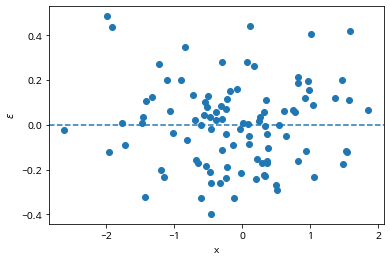

In [23]:
plt.scatter(x, eps)
plt.axhline(np.mean(eps), linestyle="--")
plt.ylabel("$\\epsilon$")
plt.xlabel("x")
plt.show()